In [1]:
import calc_rotation
from calc_rotation.sim_data.export_hdf5 import export_h5py_bz
from calc_rotation.sim_data.export_hdf5 import export_h5py_ne
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = '/home/pawel/Work/PIConGPU/151_PizDaintCopper30nmPerfectContrast/simOutput/h5/'

In [3]:
! ls $path

simData_0.h5	   simData_137500.h5  simData_25000.h5	simData_65000.h5
simData_100000.h5  simData_140000.h5  simData_2500.h5	simData_67500.h5
simData_10000.h5   simData_142500.h5  simData_27500.h5	simData_70000.h5
simData_102500.h5  simData_145000.h5  simData_30000.h5	simData_72500.h5
simData_105000.h5  simData_147500.h5  simData_32500.h5	simData_75000.h5
simData_107500.h5  simData_150000.h5  simData_35000.h5	simData_7500.h5
simData_110000.h5  simData_15000.h5   simData_37500.h5	simData_77500.h5
simData_112500.h5  simData_152500.h5  simData_40000.h5	simData_80000.h5
simData_115000.h5  simData_155000.h5  simData_42500.h5	simData_82500.h5
simData_117500.h5  simData_157500.h5  simData_45000.h5	simData_85000.h5
simData_120000.h5  simData_160000.h5  simData_47500.h5	simData_87500.h5
simData_122500.h5  simData_162500.h5  simData_50000.h5	simData_90000.h5
simData_125000.h5  simData_165000.h5  simData_5000.h5	simData_92500.h5
simData_12500.h5   simData_167500.h5  simData_52500.h5	simData_95000.h

In [4]:
file = h5py.File(path + 'simData_0.h5')
grid_unit = file['data/0/fields/e_density'].attrs['gridUnitSI'] 
dt = file['data/0'].attrs['dt'] * file['data/0'].attrs['timeUnitSI']

In [5]:
print(grid_unit, dt)

4.243442250649631e-10 1.415459974863554e-18


In [6]:
inc_time = 50036 * dt

In [7]:
file_list = calc_rotation.sim_data.FilesLists.UniversalSingle(path, 'Bz', dt, grid_unit, 'simData_', '.h5',
                                   export_h5py_bz)

In [8]:
file_list2 = calc_rotation.sim_data.FilesLists.UniversalSingle(path, 'n_e', dt, grid_unit, 'simData_', '.h5',
                                   export_h5py_bz)

In [39]:
sequence = calc_rotation.SimSequence.seq_cells(0,256, inc_time, 2500, 10, {'Bz': file_list, 'n_e': file_list2})

In [40]:
sequence.number_of_steps

1

In [41]:
rotated = sequence.rotation_2d_perp()

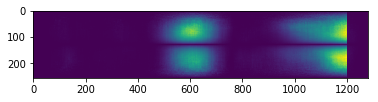

In [16]:
plt.imshow(rotated[0,:])
           

In [9]:
file_list.open(0, 'Bz').shape

(1280, 256)

In [10]:
file_list.ids

array([     0,   2500,   5000,   7500,  10000,  12500,  15000,  17500,
        20000,  22500,  25000,  27500,  30000,  32500,  35000,  37500,
        40000,  42500,  45000,  47500,  50000,  52500,  55000,  57500,
        60000,  62500,  65000,  67500,  70000,  72500,  75000,  77500,
        80000,  82500,  85000,  87500,  90000,  92500,  95000,  97500,
       100000, 102500, 105000, 107500, 110000, 112500, 115000, 117500,
       120000, 122500, 125000, 127500, 130000, 132500, 135000, 137500,
       140000, 142500, 145000, 147500, 150000, 152500, 155000, 157500,
       160000, 162500, 165000, 167500, 170000])

In [ ]:
5000 * 21 - 170000

In [ ]:
170000 * dt * 10**15

In [ ]:
grid_unit * 256 / speed_of_light * 10**15

In [34]:
from scipy.constants import speed_of_light

In [17]:
10 * 10**(-15) * speed_of_light / grid_unit

7064.841237184379

In [43]:
10 /(grid_unit / speed_of_light * 10**15) 

9.812279496089413

In [14]:
256 * grid_unit

1.0863212161663055e-07

In [33]:
100 * 256 * 1280 * 64 /8 / 1000000000

0.262144